In [10]:
import pandas as pd
import sklearn
import re  
import matplotlib.pyplot as plt
import string
import numpy as np
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [12]:
DF =pd.read_csv("cleaned_departures_development_traffic1.csv")
DF = DF.drop(columns=["Name", "Development_Level", "Area"])
DF = DF.dropna()
print(DF.head())

#from sklearn.model_selection import train_test_split
TrainDF,TestDF = train_test_split(DF, test_size=0.3)
print(TrainDF)
print(TestDF.shape)
print("\nThe training set is:")
print(TrainDF)
print("\nThe testing set is:")
print(TestDF)

   Departures  Domestic  International  FlagCarrier_Flights   Traffic
0        7422         0           7422                 1925     Small
1       11822      8395           3427                11496  Moderate
2        4978      2907           2071                 5891     Small
3        3742         8           3734                 2249     Small
4        6535         0           6535                 4085     Small
     Departures  Domestic  International  FlagCarrier_Flights   Traffic
173       13724      4966           8758                15539     Small
192        1751       650           1101                 2492     Small
141        2236         0           2236                 2651     Small
163         423         0            423                  832     Small
114        3458         0           3458                    0     Small
..          ...       ...            ...                  ...       ...
87        19545     14912           4633                15433  Moderate
78  

In [13]:
## Save labels
TestLabels=TestDF["Traffic"]
print(TestLabels)
## remove labels
TestDF = TestDF.drop(["Traffic"], axis=1)
print(TestDF)
TrainDF=TrainDF.drop(["Traffic"], axis=1)
print(TrainDF)
TrainLabels=TrainDF["Traffic"]
print(TrainLabels)

99     Moderate
3         Small
164       Large
123       Small
211    Moderate
         ...   
80        Large
5         Large
68        Small
39        Small
118    Moderate
Name: Traffic, Length: 66, dtype: object
     Departures  Domestic  International  FlagCarrier_Flights
99        20175      7849          12326                  523
3          3742         8           3734                 2249
164       99286     29851          69435                66298
123        9204      7352           1852                 8029
211       20175     14897           5278                37747
..          ...       ...            ...                  ...
80       115881     59606          56275                82630
5         30478     13010          17468                10070
68         1101         0           1101                 1888
39         4184      1137           3047                  168
118       18119         0          18119                32780

[66 rows x 4 columns]
     Departures 

KeyError: 'Traffic'

In [14]:
SVM_Model1=LinearSVC(C=.001)

SVM_Model1.fit(TrainDF, TrainLabels)

print("SVM 1 prediction:\n", SVM_Model1.predict((TestDF)))
print("Actual:")
print(TestLabels)

SVM_matrix = confusion_matrix(TestLabels, SVM_Model1.predict(TestDF))
print("\nThe confusion matrix for Linear SVM is:")
print(SVM_matrix)
print("\n\n")



SVM 1 prediction:
 ['Moderate' 'Moderate' 'Moderate' 'Large' 'Moderate' 'Large' 'Moderate'
 'Moderate' 'Large' 'Large' 'Moderate' 'Moderate' 'Moderate' 'Large'
 'Large' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Large' 'Moderate' 'Moderate' 'Moderate'
 'Large' 'Large' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Large' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate']
Actual:
99     Moderate
3         Small
164       Large
123       Small
211    Moderate
         ...   
80        Large
5         Large
68        Small
39        Small
118    Moderate
Name: Traffic, Length: 66, dtype: object

The confusion matrix for Linear SVM is:
[[ 7 17 

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix

# Model 1: Linear SVM
model_linear = LinearSVC(C=0.001, max_iter=10000)
model_linear.fit(TrainDF, TrainLabels)

print("Linear SVM Prediction:\n", model_linear.predict(TestDF))
print("Actual:")
print(TestLabels)

linear_matrix = confusion_matrix(TestLabels, model_linear.predict(TestDF))
print("\nConfusion Matrix for Linear SVM:")
print(linear_matrix)

# Model 2: Polynomial SVM (degree 2)
model_poly = SVC(kernel='poly', degree=2, C=1)
model_poly.fit(TrainDF, TrainLabels)

print("\nPolynomial SVM (degree 2) Prediction:\n", model_poly.predict(TestDF))
print("Actual:")
print(TestLabels)

poly_matrix = confusion_matrix(TestLabels, model_poly.predict(TestDF))
print("\nConfusion Matrix for Polynomial SVM (degree 2):")
print(poly_matrix)

# Model 3: RBF Kernel SVM
model_rbf = SVC(kernel='rbf', C=1)
model_rbf.fit(TrainDF, TrainLabels)

print("\nRBF Kernel SVM Prediction:\n", model_rbf.predict(TestDF))
print("Actual:")
print(TestLabels)

rbf_matrix = confusion_matrix(TestLabels, model_rbf.predict(TestDF))
print("\nConfusion Matrix for RBF Kernel SVM:")
print(rbf_matrix)

Linear SVM Prediction:
 ['Large' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Large'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Large' 'Moderate' 'Moderate'
 'Moderate' 'Large' 'Moderate' 'Moderate' 'Large' 'Moderate' 'Large'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Large' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Large' 'Large' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Large' 'Moderate' 'Moderate' 'Large' 'Moderate'
 'Large' 'Large' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Large' 'Moderate' 'Moderate'
 'Large' 'Moderate' 'Large' 'Moderate']
Actual:
99     Moderate
3         Small
164       Large
123       Small
211    Moderate
         ...   
80        Large
5         Large
68        Small
39        Small
118    Moderate
Name: Traffic, Length: 66, dtype: object

Confusion Matrix for Linear SVM:
[[ 3 21  0]
 [ 2 10  0]
 [11

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Screen image of formatted Training Data:
     Departures  Domestic  International  FlagCarrier_Flights
173       13724      4966           8758                15539
192        1751       650           1101                 2492
141        2236         0           2236                 2651
163         423         0            423                  832
114        3458         0           3458                    0 

Screen image of labels:
211    Moderate
57     Moderate
15        Large
100    Moderate
51        Large
Name: Traffic, dtype: object 

Screen image of formatted Testing Data:
     Departures  Domestic  International  FlagCarrier_Flights
99        20175      7849          12326                  523
3          3742         8           3734                 2249
164       99286     29851          69435                66298
123        9204      7352           1852                 8029
211       20175     14897           5278                37747 

Screen image of Testing Labels:
99  

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


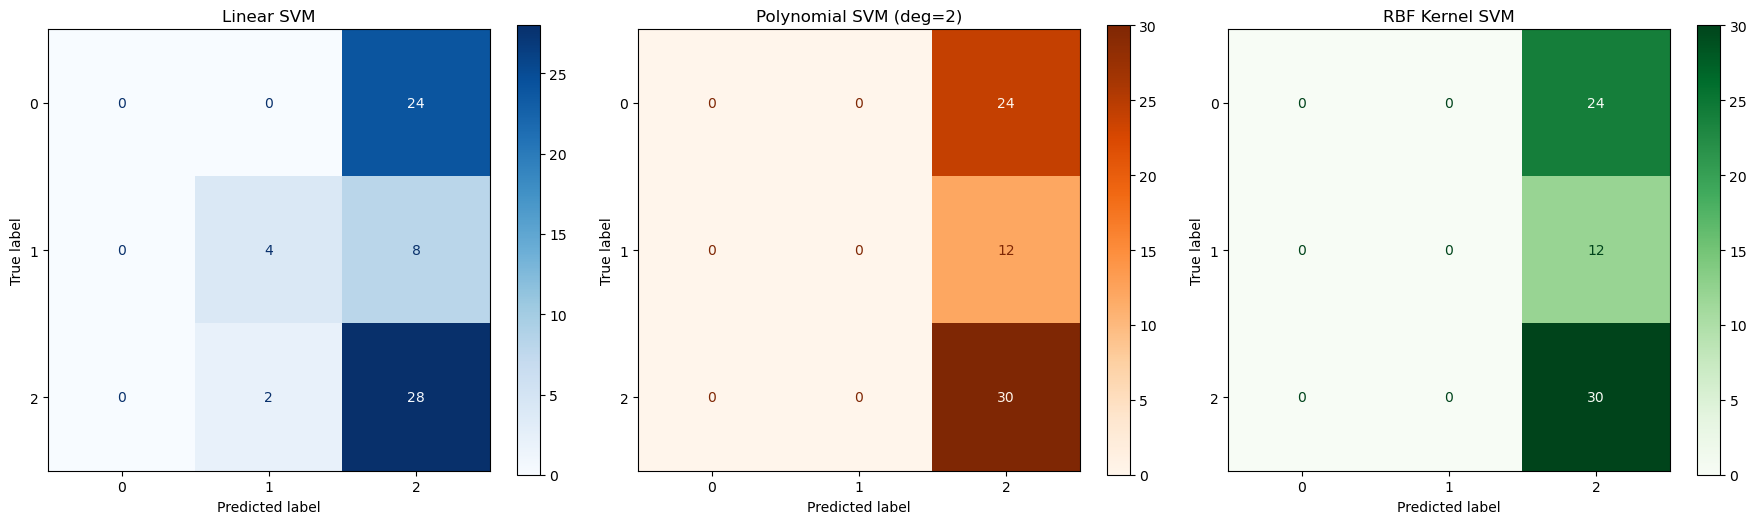

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert to DataFrame if not already
TrainDF = pd.DataFrame(TrainDF)
TestDF = pd.DataFrame(TestDF)
TrainLabels = pd.Series(TrainLabels)
TestLabels = pd.Series(TestLabels)

# Pretty print data
print("Screen image of formatted Training Data:")
print(TrainDF.head(), "\n")

print("Screen image of labels:")
print(TrainLabels.head(), "\n")

print("Screen image of formatted Testing Data:")
print(TestDF.head(), "\n")

print("Screen image of Testing Labels:")
print(TestLabels.head(), "\n")

# Model 1: Linear SVM
model_linear = LinearSVC(C=0.001, max_iter=10000)
model_linear.fit(TrainDF, TrainLabels)
pred_linear = model_linear.predict(TestDF)

# Model 2: Polynomial SVM (degree 2)
model_poly = SVC(kernel='poly', degree=2, C=1)
model_poly.fit(TrainDF, TrainLabels)
pred_poly = model_poly.predict(TestDF)

# Model 3: RBF Kernel SVM
model_rbf = SVC(kernel='rbf', C=1)
model_rbf.fit(TrainDF, TrainLabels)
pred_rbf = model_rbf.predict(TestDF)

# Plot Confusion Matrix for each model
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

cm_linear = confusion_matrix(TestLabels, pred_linear)
ConfusionMatrixDisplay(cm_linear).plot(ax=axs[0], cmap='Blues')
axs[0].set_title("Linear SVM")

cm_poly = confusion_matrix(TestLabels, pred_poly)
ConfusionMatrixDisplay(cm_poly).plot(ax=axs[1], cmap='Oranges')
axs[1].set_title("Polynomial SVM (deg=2)")

cm_rbf = confusion_matrix(TestLabels, pred_rbf)
ConfusionMatrixDisplay(cm_rbf).plot(ax=axs[2], cmap='Greens')
axs[2].set_title("RBF Kernel SVM")

plt.tight_layout()
plt.show()